In [9]:
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
from pyvis.network import Network

In [10]:
ad_genes = "APP,HFE,MPO,NOS3,PLAU,ABCA7,PSEN2,PSEN1,APOE"
schizo_genes = "APOL2,APOL4,CHI3L1,COMT,DAOA,DISC2,DRD3,HTR2A,MTHFR,RTN4R,SYN2,SHANK3,DISC1,RBM12,NRXN1,SLC1A1,PRODH,NRG1"

ad_dict = {
    # Alzheimer
    "APP": "9606.ENSP00000284981",
    "HFE": "9606.ENSP00000417404",
    "MPO": "9606.ENSP00000225275",
    "NOS3": "9606.ENSP00000297494",
    "PLAU": "9606.ENSP00000361850",
    "ABCA7": "9606.ENSP00000263094",
    "APOE": "9606.ENSP00000252486"
}

schizo_dict = {
    # Schizophrenia
    "APOL2": "9606.ENSP00000249066",
    "APOL4": "9606.ENSP00000338260",
    "CHI3L1": "9606.ENSP00000255409",
    "COMT": "9606.ENSP00000354511",
    "DAOA": "9606.ENSP00000483757",
    "DISC1": "9606.ENSP00000355593",
    "DRD3": "9606.ENSP00000373169",
    "HTR2A": "9606.ENSP00000437737",
    "MTHFR": "9606.ENSP00000365777",
    "NRG1": "9606.ENSP00000384620",
    "NRXN1": "9606.ENSP00000385142",
    "PRODH": "9606.ENSP00000481127",
    "PSEN1": "9606.ENSP00000326366",
    "PSEN2": "9606.ENSP00000355747",
    "RBM12": "9606.ENSP00000363228",
    "RTN4R": "9606.ENSP00000043402",
    "SLC1A1": "9606.ENSP00000262352",
    "SYN2": "9606.ENSP00000480050",
}

In [11]:
# Import and Filter whole Protein Network File

df_ad = pd.read_csv('ad_network.csv', sep=",")
df_schiz = pd.read_csv('schiz_network.csv', sep=",")

In [12]:
def save_graph(graph, file_name):
    #initialze Figure
    nt = Network('800px', '1200px')
    # populates the nodes and edges data structures
    nt.from_nx(graph)
    nt.show(f'{file_name}.html')


In [13]:

#col1 = protein1
#col2 = protein2

Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df_ad, source="protein1", target="protein2",
                            create_using=Graphtype, edge_attr="protein1")
save_graph(G, file_name="ad_network_graph")

In [14]:

#col1 = protein1
#col2 = protein2

Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df_schiz, source="protein1", target="protein2",
                            create_using=Graphtype, edge_attr="protein1")
save_graph(G, file_name="schiz_network_graph")


## In the next example we are going to create a network from a single protein (APP)

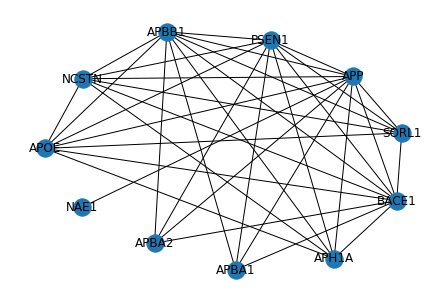

In [15]:

df = pd.read_csv('app_protein_interaction.csv', sep="\t")
Graphtype = nx.Graph()
G = nx.from_pandas_edgelist(df, source="Source", target="Target",
                            create_using=Graphtype, edge_attr="Source")
pos = nx.spring_layout(G, k=10)  # For better example looking
nx.draw(G, pos, with_labels=True)
plt.show()

In [ ]:
tsv_files = 'data/schiz/*.tsv'
csv_table = pd.read_table(tsv_files, sep='\t')
csv_table.to_csv('new_name.csv', index=False)